#**(8)K-Nearest Neighbor(Supervised Learning,Mainly Classification Problems Based)**
- The k-nearest neighbor(KNN) algorithm is a type of supervised machine learning algorithm used to solve classification and regression problems. However, it's **mainly used for classification problems.**

- K-NN algorithm work on the basis of the **similarity between the new data point and old available data points and put the new data point into the category that is most similar to the old available  data categories.**

- KNN is also called a **lazy learner** because when we supply training data to this algorithm, the **algorithm does not train itself and it does not do any calculations at this time**, at first it stores the dataset and **at the time of classification of new unseen data points it performs an calculations action on the dataset.**

- KNN algorithm **at the training phase just stores the dataset** and when it gets new data, then it classifies that data into a category that is much similar to the new data.

<figure align="center">
<img src="https://drive.google.com/uc?id=1e_G0Wzz3DDl_mNA2gt6dbyQgv2eDVxip" height="300px", width="500px"> 
</figure>


##**Mathematics Behind K-Nearest Neighbor Algorithm:**


Assuming we have input data points $x_{0}$, $x_{1}$, $x_{2}$, $x_{3}$ ,…,$x_{n}$ and $y_{0}$, $y_{1}$, $xy_{2}$, $y_{3}$,..….$y_{n}$,and number K of the neighbors.

We follow the below procedure:

(1)Select the  K numbers of neighbors points for new data points.

(2)After that Calculate the Euclidean distance between of K numbers of neighbors and new data points.

(3)Select the K nearest neighbors for new data point as per the calculated Euclidean distance,lower the Euclidean distance then it will be the neighbors for new data point.

(4)Among these k neighbors, count the number of the data points in each category.

(5)Now assign  the new data points to that category for which the number of the neighbor is maximum.

**Euclidean Distance between two points:**

 Euclidean Distance(ED)=$\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}$


where,

$x_{2}$ and $y_{2}$ are x point and y point of new data point respectively.

$x_{1}$ and $y_{1}$ are neighbors x point and y point respectively.



#**Model building in Scikit-learn:**
- We can use cancer dataset from scikit-learn library or we can also download it from kaggle.
- The dataset has 30 features (mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, and worst fractal dimension) and a target (type of cancer).

- Data has two types of cancer  **malignant(0 or harmful) and benign (1 or not harmful).** Here, we have to find out the type of cancer.

###**Let's first load the required library and dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets
#Load dataset from Scikit-learn library
cancer = datasets.load_breast_cancer()

In [ ]:
# print the names of the 30 features
print("Features/Independent variables: ", cancer.feature_names)
# print the label type of cancer('malignant' 'benign')
print("labels/Target variables: ", cancer.target_names)

Features/Independent variables:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
labels/Target variables:  ['malignant' 'benign']


In [ ]:
cancer.data.shape

(569, 30)

In [ ]:
# print the cancer data features (top 5 records)
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

we know malignant(0 or harmful) and benign (1 or not harmful).

In [ ]:
# print the cancer labels (malignant:0, benign:1)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

Split the dataset by using the function train_test_split(). we need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=42) 

In [ ]:
#Feature Scaling techniques to bring features in same scale.
from sklearn.preprocessing import RobustScaler # Or we can also use StandardScaler,MinMaxScaler depending on the dataset.
rb = RobustScaler()  
X_train = rb.fit_transform(X_train)
X_test = rb.transform(X_test)

pd.DataFrame(X_train )   ##Convert numpy array generated by sklearn libraries to orginal dataframe.
pd.DataFrame(X_test )    ##Convert numpy array generated by sklearn libraries to orginal dataframe.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-0.185591,-0.018570,-0.163984,-0.173345,0.265522,0.216176,0.186378,0.076966,0.403238,0.288283,0.329220,-0.106171,0.136691,0.208000,0.172944,-0.073129,0.031845,-0.118003,-0.114943,0.162773,-0.000888,-0.061751,-0.041587,-0.017973,0.361484,0.146957,0.152484,0.023105,0.304236,0.356241
1,1.306052,0.484680,1.261569,1.572496,-0.239630,0.173000,0.473074,0.852262,-0.606328,-0.804915,2.014808,-0.515096,2.006569,2.713143,-0.631351,-0.209391,-0.126281,0.379402,-0.635140,-0.673458,1.754993,0.170863,1.672208,2.183435,-0.374112,0.125338,0.158449,0.825053,-0.377901,-0.693298
2,0.503746,0.144847,0.527163,0.545895,0.770145,0.461830,0.869012,0.877792,0.420898,-0.403356,0.664878,-0.534340,0.510166,0.894476,-0.055618,-0.297777,0.072840,-0.034355,-0.620690,-0.335511,0.760763,0.101319,0.666258,0.867890,0.740331,0.155192,0.570044,0.540123,0.043462,0.001214
3,-0.201729,-0.189415,-0.151241,-0.211327,0.569353,0.600290,0.159298,-0.114886,0.067697,1.162122,-0.612512,0.583942,-0.046606,-0.358095,1.149703,0.655005,0.822474,0.076179,0.417077,1.234193,-0.371949,-0.269185,-0.199595,-0.318325,0.437253,0.276155,0.052568,-0.264933,-0.370534,0.652016
4,-0.400000,-0.791086,-0.379946,-0.386154,0.275561,0.308483,0.056313,-0.153370,0.088300,0.778544,-0.175985,1.094891,-0.406944,-0.151238,1.838916,1.084835,1.075769,0.564622,-0.038752,1.015834,-0.482024,-0.656475,-0.465313,-0.425792,0.105762,0.013126,-0.173362,-0.311765,-0.704972,0.057067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.114121,-0.410399,-0.154594,-0.117853,0.194716,-0.579745,-0.260027,-0.102684,-0.582781,-0.574768,-0.354544,-0.389516,-0.505161,-0.247619,0.496394,-0.783270,-0.376647,-0.373128,0.505090,-0.581331,-0.268975,-0.646882,-0.296264,-0.245877,-0.048934,-0.713628,-0.455960,-0.419106,-0.625414,-0.780233
167,0.337752,1.247911,0.292421,0.329584,-0.627477,-0.284959,-0.213663,-0.072086,0.153054,-0.542403,-0.069965,0.459522,-0.063497,0.098286,-0.525244,-0.461923,-0.244143,0.228537,0.000657,-0.262429,0.272526,0.855516,0.236889,0.257180,-0.794002,-0.368807,-0.242707,0.105994,-0.125967,-0.515056
168,-0.777176,-0.118849,-0.716968,-0.656879,0.124967,0.567536,0.705919,0.057255,-0.350258,2.377585,0.479451,1.912741,0.533938,0.100952,2.066517,3.555439,3.424597,2.007543,2.641051,6.511571,-0.659565,-0.091727,-0.605410,-0.551047,-0.033149,0.441385,0.456333,-0.001761,-0.285083,1.750121
169,0.125648,1.075209,0.212944,0.133746,1.140026,1.143708,0.757206,0.628496,1.433407,1.323944,0.668312,0.696749,0.435095,0.541714,1.047123,0.950151,0.315520,0.746854,0.741544,1.672683,0.183755,0.933453,0.202539,0.186029,1.523283,0.964355,0.417187,0.547376,1.242726,1.852113


Let's build KNN model by passing argument n_neighbors=5.
Then, fit our model on train set using fit() and perform prediction on the test set using predict().

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
pd.DataFrame(y_pred)   ##Convert numpy array generated by sklearn libraries to orginal dataframe.

,0
0,1
1,0
2,0
3,1
4,1
...,...
166,1
167,1
168,1
169,0


Model Evaluation using Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


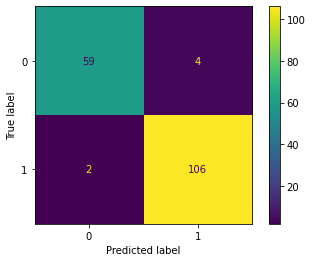

In [ ]:
from sklearn.metrics import plot_confusion_matrix
display = plot_confusion_matrix(clf,X_test,y_test)
plt.show()

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 59,   4],
       [  2, 106]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9649122807017544


In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(precision)

0.9636363636363636


In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(recall)

0.9814814814814815


In [ ]:
from sklearn.metrics import f1_score 
f1_score = f1_score(y_test, y_pred)
print(f1_score)

0.9724770642201834
